<a href="https://colab.research.google.com/github/jmcgunn/Kalman-and-Bayesian-Filters-in-Python/blob/master/RevPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input(X): Outside Air Temp
Output(Y): Overall daily revenue generated in dollars

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [6]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [8]:
sales_df.head(10)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [11]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


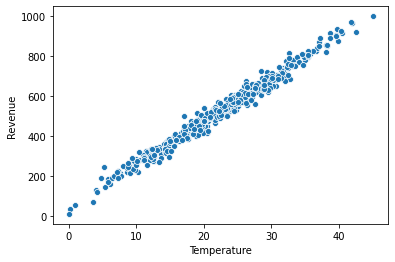

In [12]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

In [0]:
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [14]:
X_train.shape

(500,)

In [15]:
Y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [19]:
epochs_hist = model.fit(X_train, Y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 268765.8750
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 229958.6406
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 195405.9688
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 164879.3281
Epoch 5/1000
16/16 [==============================] - 0s 980us/step - loss: 137763.5938
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 114709.3594
Epoch 7/1000
16/16 [==============================] - 0s 987us/step - loss: 94503.6016
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 77457.0156
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 62746.3203
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 50590.3398
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 40475.9961
Epoch 12/1000
16/16 [==============================] 

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

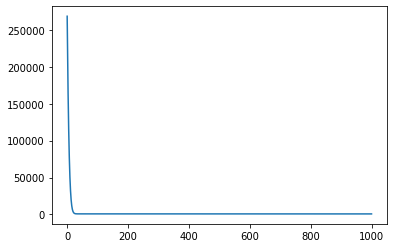

In [23]:
plt.plot(epochs_hist.history['loss'])

In [24]:
model.get_weights()

[array([[21.30477]], dtype=float32), array([44.556713], dtype=float32)]

In [27]:
Temp = 5
Revenue = model.predict([Temp])
print(Revenue)

[[151.08057]]


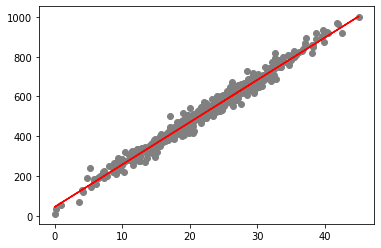

In [28]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')